In [219]:
#XGBOOST- XGBOOST is used to implementation of extreme gradient boosted decision trees desigened foe speed and better performance 
#for machine learning . first introducded in 1999 by Tianqi Chen in C++ but now has interfaces for Python, R, Julia.
#Gradient Boosted Decision tree :A machine learning technique uses an ensemble of decision trres to predict a target label.
#typicaly used with large number of leves of between 8 anad 32

In [220]:
#you need to install XGBOOST by using pip3 install xgboost if not installed already
#to use its classifier you need to  use from xgboost import_XGBClassifier 
#or to use from sklearn you can use 
#import sklearn 
#from xgboost.sklearn import XGBClassifier

In [221]:
# below  i am using XGBoost to train and test adult data from uci to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. The
#description of the dataset is as follows:.


In [222]:
#Data Set Information:
#Extraction was done by Barry Becker from the 1994 Census
#database. A set of reasonably clean records was extracted using the
#following conditions: ((AAGE>16) && (AGI>100) &&
#(AFNLWGT>1)&& (HRSWK>0))

#Attribute Information:
#Listing of attributes: >50K, <=50K.
#age: continuous.
#workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
#Local-gov, State-gov, Without-pay, Never-worked.
#fnlwgt: continuous.
#education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
#Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
#Doctorate, 5th-6th, Preschool.
#education-num: continuous.

#marital-status: Married-civ-spouse, Divorced, Never-married,
#Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

#occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-
#managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,

#Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,
#Protective-serv, Armed-Forces.
#relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,
#Unmarried.
#race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
#sex: Female, Male.
#capital-gain: continuous.
#capital-loss: continuous.
#hours-per-week: continuous.
#native-country: United-States, Cambodia, England, Puerto-Rico,
#Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,
#Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,
#Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
#Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,

#Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
#Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#Following is the code to load required libraries and data:
#import numpy as np
#import pandas as pd

#train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
#test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-
#databases/adult/adult.test' , skiprows = 1, header = None)

#col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
#'marital_status', 'occupation','relationship', 'race', 'sex', capital_gain',
#'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
#train_set.columns = col_labels
#test_set.columns = col_labels

In [223]:
import numpy as np # importing numpy 
import pandas as pd # importing pandas
import matplotlib.pyplot as plt # import matplotlib.pythone if need to visulaize your data
import re # import to use regular expression matching operations
import sklearn
import xgboost as xgb #import XGBOOST
from xgboost.sklearn import XGBClassifier # XGBoost model for classification called XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing #package provides several common utility functions and transformer classes to change raw 
#feature vectors into a representation that is more suitable for the downstream estimators.

In [224]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [225]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [226]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
#columns name according to adult names as per  attribute information
cols=["age","workclass","fnlwgt","education","education-num","marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week","native-country","wage_class"]

train_set=pd.read_csv(url, names=cols)   # reading and setting names

train_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [227]:
# preparing test data by skiping frst row  coz row one is multi index  by using skiprows = 1
test_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',skiprows = 1, header = None, names=cols)  
test_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [228]:
# cheking null values in each frame  
train_set.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage_class        0
dtype: int64

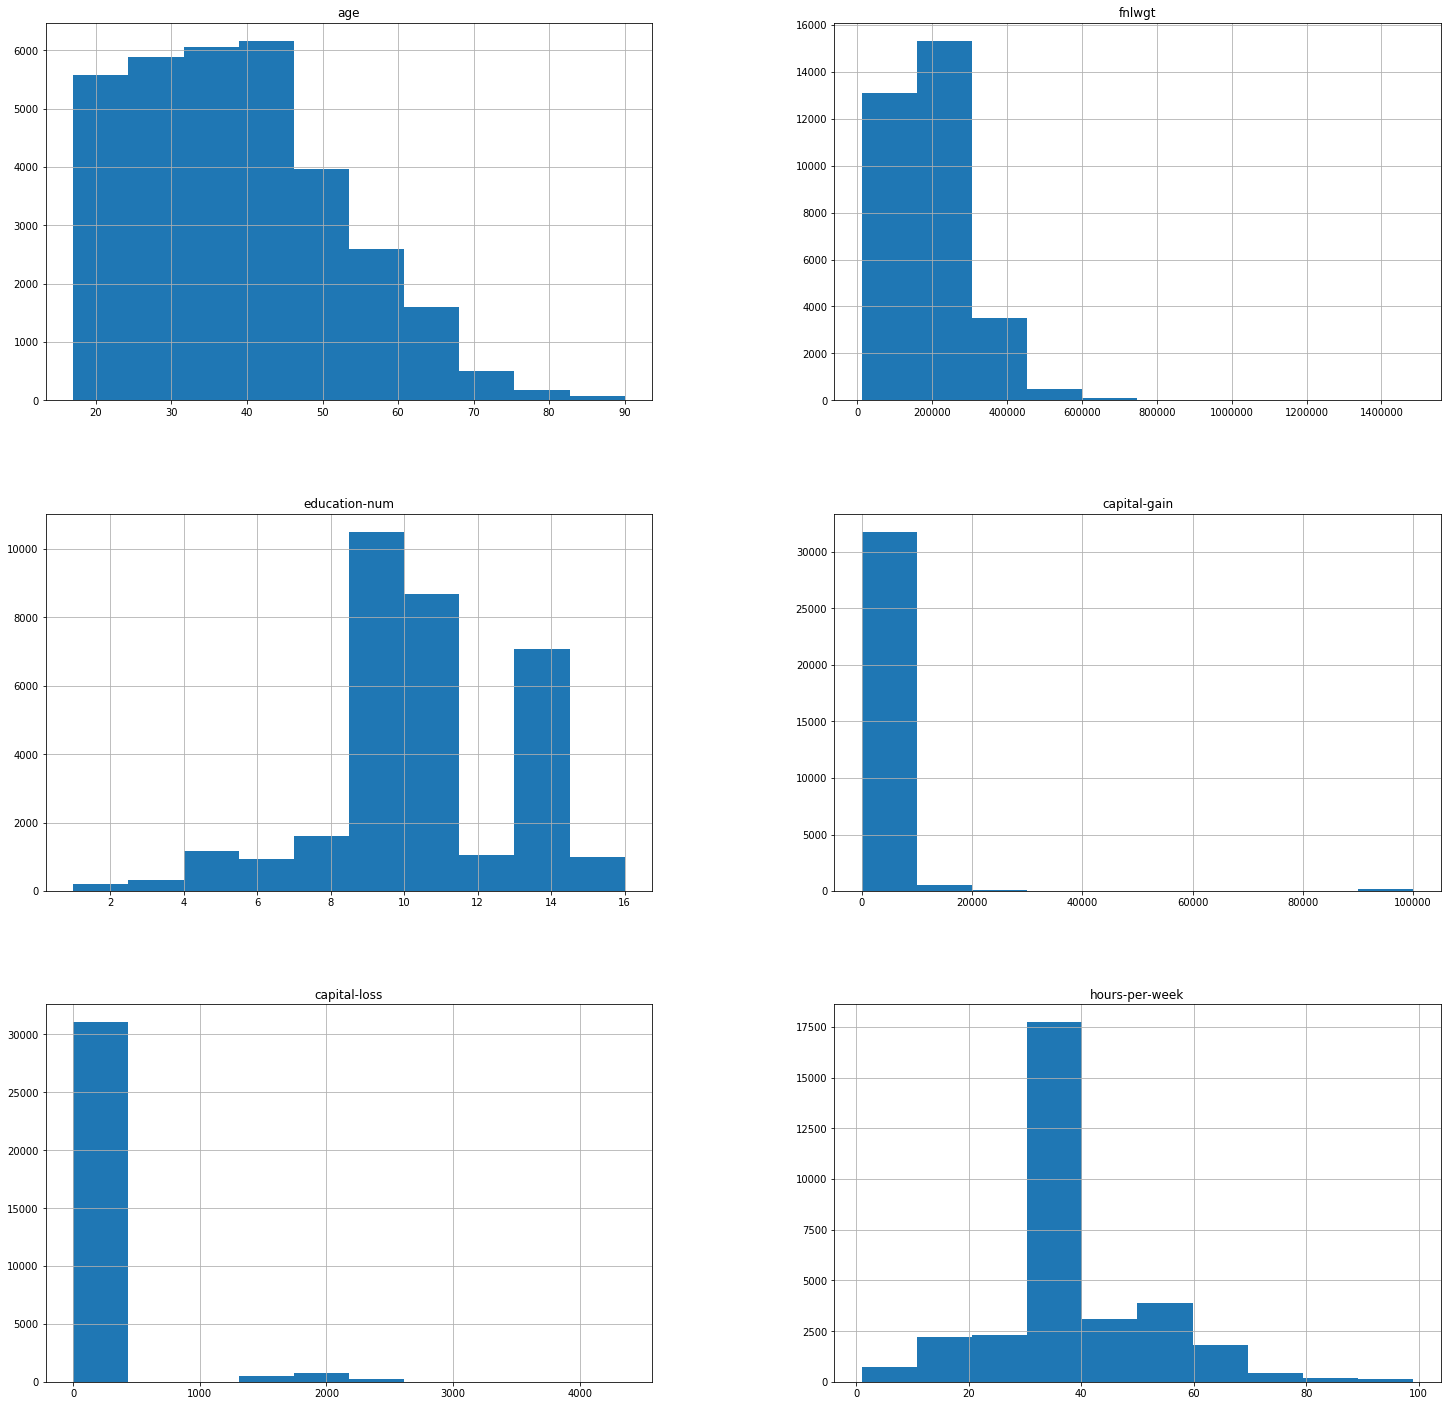

In [229]:
train_set.hist(figsize=(25,25))
plt.show() # need to add  while importinh all packages  by using import matplotlib.pyplot as plt

In [230]:
# check data types for all column. how many integer and objects type we have  6 out of 14 are integer type
train_set.dtypes  


age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage_class        object
dtype: object

In [231]:
# to prepare the dta needto check valuea and handle  if any exceptional dat available 
# in this set we have workclass vae as '?' . needto handle 
train_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [232]:
for feature in cols:
    if train_set[feature].dtype == 'object':
        
        print('_'*10,feature, end=" ",)
        print('_'*10)
        print(train_set[feature].value_counts())

__________ workclass __________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
__________ education __________
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
__________ marital-status __________
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name

In [233]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'wage_class'],
      dtype='object')

In [234]:
train_set.rename(columns=lambda name: re.sub(r"\-",'_',name), inplace=True)

In [235]:
#filtering unusual data in rows  from workclass and native_country
filter1 = train_set["workclass"]=="?"
index = train_set[train_set["native_country"]== ' ?'].index 
index.value_counts().sum()  

583

In [236]:
#now apply the filter for the '?' value in those above 3 columns
indexes_list = [] # will contain three index series of desired syntexes
def filter_questionMark(l):
    
    for item in l:
        print('_'*10,item, '_'*10)
        index = train_set[train_set[item]== ' ?'].index
        indexes_list.append(index)
        #index.value_counts()  # to display all the indexes having value '?'
        print("Total `?` in {0}: {1}".format(item, index.value_counts().sum()))  # sum of those indexes 
        print("Total % of `?` in {0}: {1}".format(item, round((index.value_counts().sum()/train_set.shape[0])*100,2)))
        
filter2= ['workclass','occupation', 'native_country']
filter_questionMark(filter2)

__________ workclass __________
Total `?` in workclass: 1836
Total % of `?` in workclass: 5.64
__________ occupation __________
Total `?` in occupation: 1843
Total % of `?` in occupation: 5.66
__________ native_country __________
Total `?` in native_country: 583
Total % of `?` in native_country: 1.79


In [237]:
print("Original Shape of Train Set:", train_set.shape)
print("Rows in Train Set:", train_set.shape[0])

Original Shape of Train Set: (32561, 15)
Rows in Train Set: 32561


In [238]:
train_set= train_set.drop(index)
print("Total New rows:",train_set.shape[0])

Total New rows: 31978


In [239]:
index1= train_set[train_set["native_country"]== ' ?'].index
train_set = train_set.drop(index1)
print("Total New rows in native_country:",train_set.shape[0])

index2 = train_set[train_set["occupation"]== ' ?'].index
train_set = train_set.drop(index2)
print("Total New rows occupation:",train_set.shape[0])

Total New rows in native_country: 31978
Total New rows occupation: 30162


In [240]:
filter_questionMark(filter2)

__________ workclass __________
Total `?` in workclass: 0
Total % of `?` in workclass: 0.0
__________ occupation __________
Total `?` in occupation: 0
Total % of `?` in occupation: 0.0
__________ native_country __________
Total `?` in native_country: 0
Total % of `?` in native_country: 0.0


In [241]:
df1 = train_set.copy()
objectFeature = []
for i in list(df1.columns):
    if (df1[i].dtypes == 'object'):
        objectFeature.append(i)       

df1=pd.get_dummies(df1[objectFeature[:-1]])
df1

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [242]:
intFeature = []
for i in list(train_set.columns):
    if (train_set[i].dtypes == 'int64'):
        intFeature.append(i)

df2 = train_set[intFeature]
df2

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [243]:
print(df1.shape)
print(df2.shape)

(30162, 98)
(30162, 6)


In [244]:
X_train = pd.concat([df1, df2], axis=1) #concatenating both df1+df2 98+6 =104
print("#prepared dataframe to be get Trained")
X_train.shape

#prepared dataframe to be get Trained


(30162, 104)

In [245]:
y=train_set[objectFeature[-1]]

In [246]:
le = preprocessing.LabelEncoder() # refering from sklearn import preprocessing
#le.classes_   # will display only two classes---> array([' <=50K', ' >50K'], dtype=object)y_train
y_train=le.fit_transform(y)

In [247]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [248]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': .5,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 100
}

In [249]:
#spliting dat into train and test
x_train, x_test, y_t1, y_t2 =train_test_split(X_train, y_train, test_size=.25)

In [250]:
x_train.shape, x_test.shape, y_t1.shape, y_t2.shape

((22621, 104), (7541, 104), (22621,), (7541,))

In [251]:
#Model Training : making model 1

xgb = XGBClassifier(**params).fit(x_train,y_t1)

C:\Users\OM\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:46:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [252]:
y_pred= xgb.predict(x_test)

In [253]:
accuracy_score(y_t2, y_pred)

0.869778543959687

In [254]:
#Making model no .2
eval_set = [(x_train,y_t1), (x_test, y_t2)]
xgb1 = XGBClassifier(**params).fit(x_train,y_t1,
                                   early_stopping_rounds=15, 
                                   eval_metric=["error", "logloss"], 
                                   eval_set=eval_set,
                                   verbose=True)

[16:46:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.17652	validation_0-logloss:0.50758	validation_1-error:0.17358	validation_1-logloss:0.50543
[1]	validation_0-error:0.16020	validation_0-logloss:0.43630	validation_1-error:0.15833	validation_1-logloss:0.43291
[2]	validation_0-error:0.15990	validation_0-logloss:0.40217	validation_1-error:0.16298	validation_1-logloss:0.39971
[3]	validation_0-error:0.15388	validation_0-logloss:0.37897	validation_1-error:0.15648	validation_1-logloss:0.37555
[4]	validation_0-error:0.15203	validation_0-logloss:0.36454	validation_1-error:0.15343	validation_1-logloss:0.36055
[5]	validation_0-error:0.15203	valid

[67]	validation_0-error:0.13063	validation_0-logloss:0.28506	validation_1-error:0.13208	validation_1-logloss:0.28938
[68]	validation_0-error:0.13015	validation_0-logloss:0.28413	validation_1-error:0.13155	validation_1-logloss:0.28856
[69]	validation_0-error:0.13023	validation_0-logloss:0.28400	validation_1-error:0.13155	validation_1-logloss:0.28850
[70]	validation_0-error:0.13032	validation_0-logloss:0.28363	validation_1-error:0.13168	validation_1-logloss:0.28826
[71]	validation_0-error:0.12961	validation_0-logloss:0.28297	validation_1-error:0.13181	validation_1-logloss:0.28796
[72]	validation_0-error:0.12948	validation_0-logloss:0.28284	validation_1-error:0.13181	validation_1-logloss:0.28803
[73]	validation_0-error:0.12970	validation_0-logloss:0.28261	validation_1-error:0.13274	validation_1-logloss:0.28798
[74]	validation_0-error:0.12939	validation_0-logloss:0.28229	validation_1-error:0.13248	validation_1-logloss:0.28792
[75]	validation_0-error:0.12922	validation_0-logloss:0.28203	val

In [255]:
y_pred1=xgb1.predict(x_test)

In [256]:
accuracy_score(y_t2, y_pred1)

0.8696459355523141

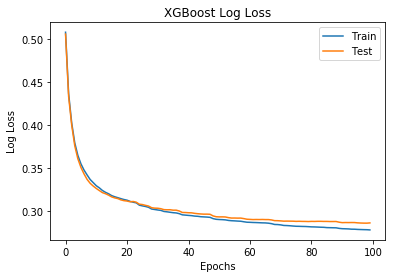

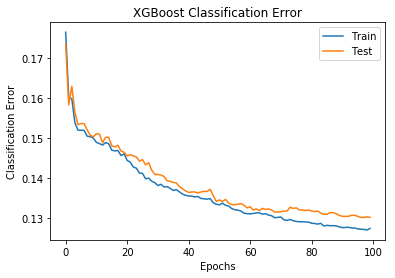

In [257]:
#visualizing with Ploting Classifying errors and log loss with respect to each iteration

# retrieve performance metrics
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['logloss'], label='Train')
ax.plot(x, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Epochs')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['error'], label='Train')
ax.plot(x, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.xlabel('Epochs')
plt.title('XGBoost Classification Error')
plt.show()

In [258]:
#model no. 3

params = {
    'objective': 'binary:logistic',
    'max_depth': 20,
    'learning_rate': .01,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 200
}

In [259]:
eval_set = [(x_train,y_t1), (x_test, y_t2)]
xgb1 = XGBClassifier(**params).fit(x_train,y_t1,
                                   early_stopping_rounds=15, 
                                   eval_metric=["error", "logloss"], 
                                   eval_set=eval_set,
                                   verbose=True)

[16:46:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.09752	validation_0-logloss:0.68636	validation_1-error:0.16483	validation_1-logloss:0.68709
[1]	validation_0-error:0.09403	validation_0-logloss:0.67968	validation_1-error:0.16258	validation_1-logloss:0.68113
[2]	validation_0-error:0.09518	validation_0-logloss:0.67318	validation_1-error:0.15767	validation_1-logloss:0.67528
[3]	validation_0-error:0.09465	validation_0-logloss:0.66678	validation_1-error:0.15847	validation_1-logloss:0.66954
[4]	validation_0-error:0.09562	validation_0-logloss:0.66053	validation_1-error:0.15966	validation_1-logloss:0.66392
[5]	validation_0-error:0.09562	valid

[67]	validation_0-error:0.07741	validation_0-logloss:0.41046	validation_1-error:0.14865	validation_1-logloss:0.45335
[68]	validation_0-error:0.07736	validation_0-logloss:0.40797	validation_1-error:0.14826	validation_1-logloss:0.45144
[69]	validation_0-error:0.07705	validation_0-logloss:0.40550	validation_1-error:0.14879	validation_1-logloss:0.44952
[70]	validation_0-error:0.07705	validation_0-logloss:0.40306	validation_1-error:0.14839	validation_1-logloss:0.44769
[71]	validation_0-error:0.07687	validation_0-logloss:0.40065	validation_1-error:0.14812	validation_1-logloss:0.44587
[72]	validation_0-error:0.07648	validation_0-logloss:0.39828	validation_1-error:0.14879	validation_1-logloss:0.44408
[73]	validation_0-error:0.07634	validation_0-logloss:0.39592	validation_1-error:0.14839	validation_1-logloss:0.44231
[74]	validation_0-error:0.07639	validation_0-logloss:0.39358	validation_1-error:0.14865	validation_1-logloss:0.44053
[75]	validation_0-error:0.07634	validation_0-logloss:0.39127	val

[137]	validation_0-error:0.06649	validation_0-logloss:0.28749	validation_1-error:0.14481	validation_1-logloss:0.36673
[138]	validation_0-error:0.06613	validation_0-logloss:0.28631	validation_1-error:0.14468	validation_1-logloss:0.36600
[139]	validation_0-error:0.06622	validation_0-logloss:0.28514	validation_1-error:0.14454	validation_1-logloss:0.36528
[140]	validation_0-error:0.06613	validation_0-logloss:0.28399	validation_1-error:0.14428	validation_1-logloss:0.36458
[141]	validation_0-error:0.06600	validation_0-logloss:0.28285	validation_1-error:0.14441	validation_1-logloss:0.36386
[142]	validation_0-error:0.06587	validation_0-logloss:0.28168	validation_1-error:0.14454	validation_1-logloss:0.36317
[143]	validation_0-error:0.06582	validation_0-logloss:0.28055	validation_1-error:0.14481	validation_1-logloss:0.36243
[144]	validation_0-error:0.06582	validation_0-logloss:0.27942	validation_1-error:0.14494	validation_1-logloss:0.36172
[145]	validation_0-error:0.06560	validation_0-logloss:0.

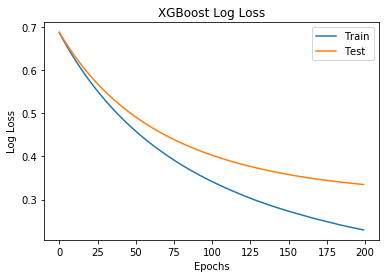

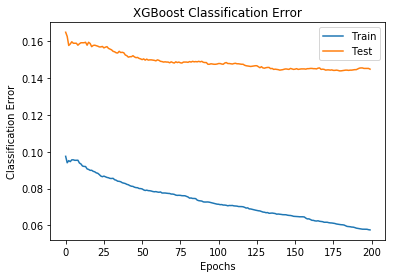

In [260]:
#plot
# retrieve performance metrics
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['logloss'], label='Train')
ax.plot(x, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Epochs')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['error'], label='Train')
ax.plot(x, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.xlabel('Epochs')
plt.title('XGBoost Classification Error')
plt.show()

In [261]:
#above 3 model return sprediction as below

##Model Training : making model 1
#xgb = XGBClassifier(**params).fit(x_train,y_t1)
#y_pred= xgb.predict(x_test)
#accuracy_score(y_t2, y_pred)
#0.8658002917384963



#Making model no .2
#eval_set = [(x_train,y_t1), (x_test, y_t2)]
#xgb1 = XGBClassifier(**params).fit(x_train,y_t1,
                                   #early_stopping_rounds=15, 
                                   #eval_metric=["error", "logloss"], 
                                   #eval_set=eval_set,
                                   #verbose=True)
#y_pred1=xgb1.predict(x_test)
#accuracy_score(y_t2, y_pred1)
#0.8655350749237501


#now lets check with XGBOOST 

In [262]:
#load data set rom x_train and x_test into respective matrix
dtrain = xgb.DMatrix(x_train, label = y_t1)
dtest = xgb.DMatrix(x_test, label = y_t2)

AttributeError: 'XGBClassifier' object has no attribute 'DMatrix'

In [ ]:
#creating watchlist of training
# to see out output 
watchlist = [(dtrain,'train'),(dtest, 'eval')]

In [ ]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': True,    # would be boolean in sklearn
    'booster' : 'gbtree',
    'max_depth' : 7,
    'eval_metric' : 'auc'
}
num_rounds = 100

In [ ]:
model_xgb = xgb.train(params, dtrain, num_rounds, evals = watchlist, early_stopping_rounds = 15, verbose_eval = True)

In [ ]:
features_contribution = pd.Series(model_xgb.get_fscore()).sort_values(ascending=False)

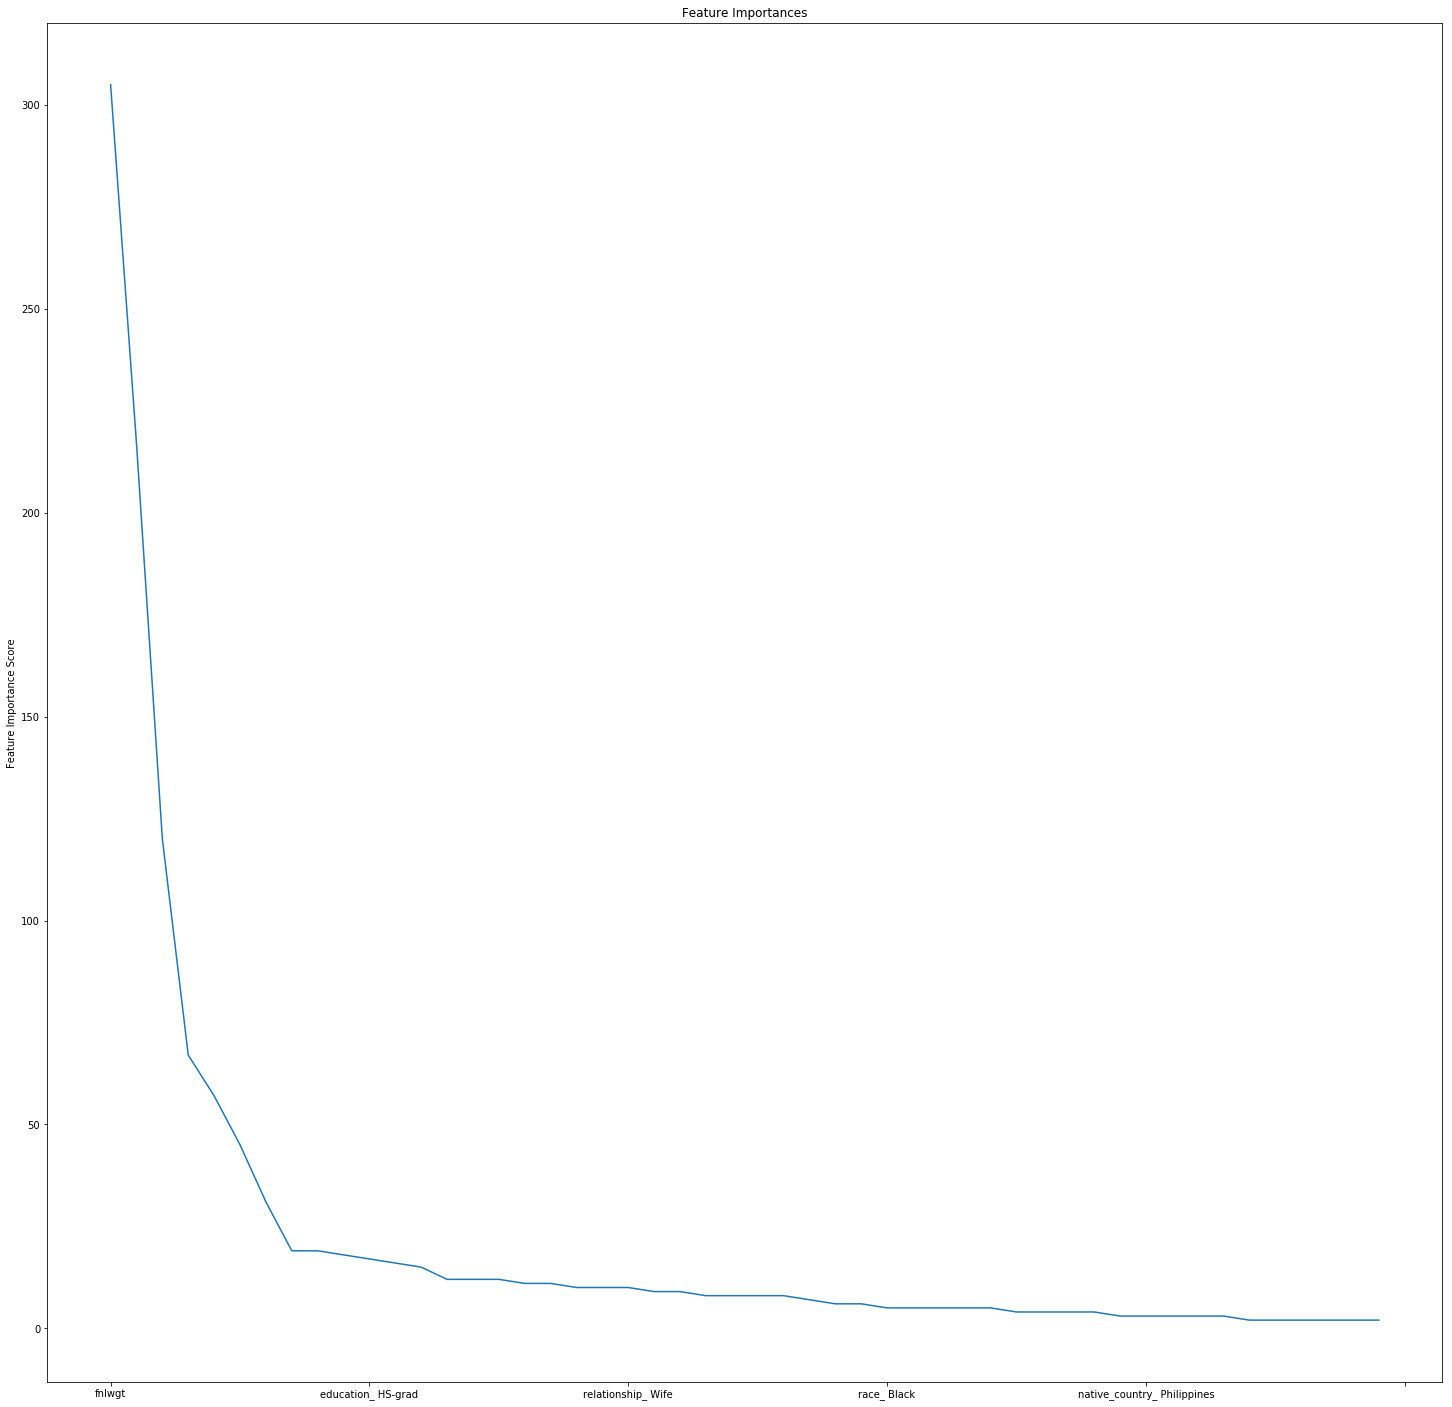

In [263]:
plt.figure(figsize=(25,25))
features_contribution[:50].plot(kind='line', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()